In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Importing data and basic exploration

In [2]:
#read data from input url
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data1=data
print("The data is imported successfully")
data

The data is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Determine the size of the data
print(data.shape)

(25, 2)


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


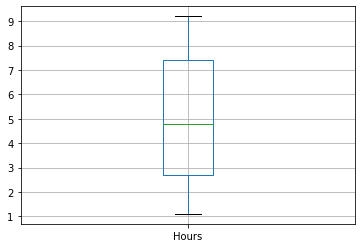

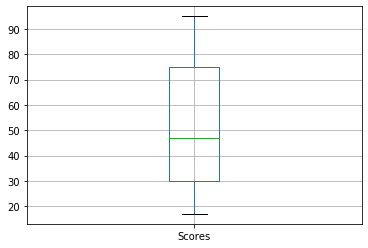

In [6]:
#Check if the data has any missing values (null)
data.isna().sum()

# Checkfor outliers using multiple boxplots
for column in data:
    if data[column].dtype in ['int64','float64']:
        plt.figure()
        data.boxplot(column=[column])



# DATA VISUALIZATION
Now let's plot a graph of our data so that it will give us clear idea about data.

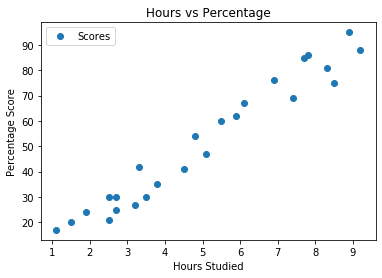

In [7]:
#Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Preparing The Data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

# Splitting the data into train and test

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape , X_test.shape

((20, 1), (5, 1))

# Building a model on the train data and checking how well the model fits

In [10]:
#importing required module to build the model
from sklearn.linear_model import LinearRegression

In [12]:
#building the model
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print("Training complete.")

Training complete.


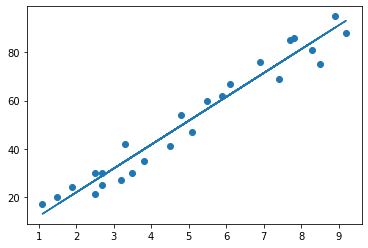

In [15]:
# Plotting the regression line
line = model.coef_*X+model.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Now that we have trained our algorithm, it's time to make some predictions

In [16]:
### Testing data - In Hours
print(X_test)

### Predicting the scores
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Comparing Actual vs Predicted

In [17]:
### Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Checking the accuracy scores for training and test set

In [13]:
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print('Train Score (R-Squared): ',train_score)
print('Test Score (R-Squared)',test_score)

Train Score (R-Squared):  0.9515510725211553
Test Score (R-Squared) 0.9454906892105354


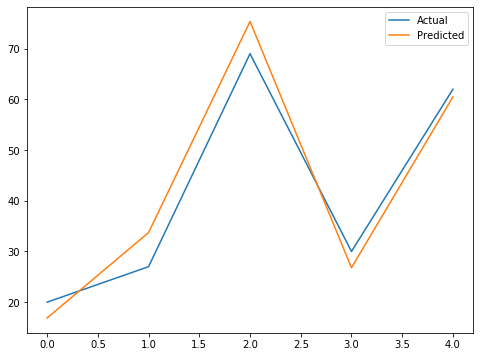

In [20]:
### Ploting the line graph to depict the diffrence between the actual and predicted value.
data.plot(kind='line', figsize=(8,6))
plt.show()

# Evaluate the model's performance on test data

In [21]:
from sklearn.metrics import mean_squared_error
#root mean square error (RMSE) calculation for train data
train_predictions = model.predict(X_train)
train_RMSE=mean_squared_error(y_train,train_predictions)**0.5
print('Train RMSE : ',train_RMSE)

Train RMSE :  5.558613350226344


In [22]:
#root mean square error (RMSE) calculation for test data
test_predictions = model.predict(X_test)
test_RMSE=mean_squared_error(y_test,test_predictions)**0.5
print('Test RMSE : ',test_RMSE)

Test RMSE :  4.647447612100373


In [23]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a dat', model.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [93.69173249]
